In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
pip install Sastrawi

     |████████████████████████████████| 215kB 2.8MB/s 


In [3]:
import json
import nltk
nltk.download('punkt')
import pandas as pd
import re,string
from nltk.tokenize import word_tokenize
from string import digits

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
def read_data():
  #data_train
  with open('/content/drive/My Drive/WordCloud/data_latih.json', 'r') as myfile:
    data=myfile.read()
  obj = json.loads(data)
  #data kamus
  data_dict=pd.read_csv("/content/drive/My Drive/WordCloud/dictionary.csv")
  #key norm
  data_key=pd.read_csv("/content/drive/My Drive/WordCloud/key_norm.csv")
  #stop word
  data_stop = set(open('/content/drive/My Drive/WordCloud/stopword_list_TALA.txt'))
  return obj,data_dict,data_key,data_stop

In [0]:
def split_isi_sent(obj):
  data=[]
  for i in range(len(obj)):
    data.append(obj[i]['isi'])
  sentiment=[]
  for i in range(len(obj)):
    sentiment.append(obj[i]['sentimen'])
  return data,sentiment

In [0]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,'')
            text = text.lower()
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)
def ubah_kata(text,kamus):
  text=word_tokenize(text)
  kata_hasil=[]
  for kata in text:
    if (kata in kamus)==True:
      kata_hasil.append(kamus_saya.get(kata))
    else:
      kata_hasil.append(kata)
  #print(kata_hasil)
  return kata_hasil
def token_kata(text,data_stop):
  #text=word_tokenize(text)
  hasil_baris=[]
  filtered_sentence = [w for w in data1 if not w in data_stop]
  for w in text: 
    if w+"\n" not in data_stop:
      if w != '':
        if not w.isdigit():
          hasil_baris.append(w)
  return hasil_baris
def stemming_data(text):
  from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  kalimat_stem = []
  for i in text:
    i = stemmer.stem(i)
    kalimat_stem.append(i)
  return kalimat_stem

In [12]:
obj,data_dict,data_key,data_stop=read_data()
data,sentiment=split_isi_sent(obj)
data1=[]
data_ubah=[]
data_final=[]
data_stem=[]
#Menghapus tanda baca, link, username
print("delete punctuation, link, username......")
for t in data:
  data1.append(strip_all_entities(strip_links(t)))
#Mengubah kata tidak baku
print("key normalization......")
kamus_saya=dict(zip(data_key['singkat'],data_key['hasil']))
for j in data1:
  data_ubah.append(ubah_kata(j,kamus_saya))
#stemmer
print("stemming.......")
for k in data_ubah:
  data_stem.append(stemming_data(k))
#Menghapus stopword
print("delete stopwords.......")
for data in data_stem:
  data_final.append(token_kata(data,data_stop))
print(data_final)

delete punctuation, link, username......
key normalization......
stemming.......
delete stopwords.......
[['penasaran', 'yang', 'pilih', 'ak'], ['layan', 'warga', 'jakarta', 'lahir', 'program'], ['golong', 'sumbu', 'pendek', 'fpi', 'piara', 'keluarga', 'cendana', 'bibib', 'risiek', 'ulama', 'mesum', 'demo', 'kerja'], ['ahok', 'didzolimi', 'ahok', 'bebas'], ['prof', 'edward', 'omar', 'sharif', 'h', 'ahli', 'pidana', 'pndpt', 'ahli', 'unsur', 'pasal', '156a', 'kuhp'], ['ahok', 'didzolimi', 'ahok', 'bebas'], ['ahok', 'djarot', 'gaul', 'badai', 'yang', 'tata', 'kota', 'jakarta'], ['penasaran', 'yang', 'pilih', 'ak'], ['surah', 'al', 'maidah', 'arti', 'umat', 'pilih', 'pimpin', 'muslim'], ['ahok', 'penjarabersih2', 'penjara', 'biar', 'ahok'], ['tunggu', 'program', 'unggul', 'ahok', 'djarot'], ['ahok', 'didzolimi', 'ahok', 'bebas'], ['ikuuut'], ['warga', 'negara', 'republik', 'indonesia', 'sosok', 'ahok'], ['wkwkwkada', 'udang', 'dbalik', 'batu'], ['dzolimi', 'bgmana', 'jelazz', 'yang', 'men

In [13]:
from nltk.probability import FreqDist
fdist=FreqDist()
for sentence in data_final:
  for word in sentence:
    fdist[word]+=1
fdist.most_common(20)

[('yang', 190),
 ('jakarta', 108),
 ('ahok', 103),
 ('warga', 76),
 ('djarot', 69),
 ('amp', 55),
 ('pilih', 45),
 ('program', 38),
 ('bangun', 37),
 ('dukung', 34),
 ('bukti', 32),
 ('kerja', 29),
 ('ya', 29),
 ('dki', 29),
 ('ahokdjarot', 26),
 ('pimpin', 25),
 ('layan', 20),
 ('rumah', 20),
 ('pilkada', 19),
 ('didik', 19)]

In [14]:
fdist.most_common()

[('yang', 190),
 ('jakarta', 108),
 ('ahok', 103),
 ('warga', 76),
 ('djarot', 69),
 ('amp', 55),
 ('pilih', 45),
 ('program', 38),
 ('bangun', 37),
 ('dukung', 34),
 ('bukti', 32),
 ('kerja', 29),
 ('ya', 29),
 ('dki', 29),
 ('ahokdjarot', 26),
 ('pimpin', 25),
 ('layan', 20),
 ('rumah', 20),
 ('pilkada', 19),
 ('didik', 19),
 ('moga', 18),
 ('langsung', 18),
 ('orang', 17),
 ('rakyat', 17),
 ('nyata', 17),
 ('basukidjarot', 16),
 ('kota', 15),
 ('putar', 15),
 ('milik', 15),
 ('sehat', 14),
 ('yuk', 14),
 ('anak', 14),
 ('hati', 13),
 ('islam', 13),
 ('menang', 13),
 ('hasil', 13),
 ('hak', 13),
 ('lihat', 13),
 ('pagi', 13),
 ('tim', 13),
 ('hadir', 13),
 ('butuh', 12),
 ('bersih', 12),
 ('banjir', 12),
 ('bantu', 12),
 ('debat', 12),
 ('bebas', 11),
 ('indonesia', 11),
 ('beda', 11),
 ('hidup', 11),
 ('seru', 11),
 ('percaya', 11),
 ('sungai', 11),
 ('kualitas', 11),
 ('bioskop', 11),
 ('gaul', 10),
 ('tata', 10),
 ('saksi', 10),
 ('keren', 10),
 ('salah', 10),
 ('kampanye', 10),
 

In [0]:
kalimat_final=[]
for kal in data_final:
  kalimat=''
  for kata in kal:
    kalimat=kalimat+' '+kata
  kalimat_final.append(kalimat)
#print(kalimat_final)

In [16]:
kalimat_final

[' penasaran yang pilih ak',
 ' layan warga jakarta lahir program',
 ' golong sumbu pendek fpi piara keluarga cendana bibib risiek ulama mesum demo kerja',
 ' ahok didzolimi ahok bebas',
 ' prof edward omar sharif h ahli pidana pndpt ahli unsur pasal 156a kuhp',
 ' ahok didzolimi ahok bebas',
 ' ahok djarot gaul badai yang tata kota jakarta',
 ' penasaran yang pilih ak',
 ' surah al maidah arti umat pilih pimpin muslim',
 ' ahok penjarabersih2 penjara biar ahok',
 ' tunggu program unggul ahok djarot',
 ' ahok didzolimi ahok bebas',
 ' ikuuut',
 ' warga negara republik indonesia sosok ahok',
 ' wkwkwkada udang dbalik batu',
 ' dzolimi bgmana jelazz yang mendolimi umat islamsampean sehat',
 ' contoh analogi orang curi indonesia yang dasar hukum positif hukum pidana penjara',
 ' yang nista agama yaa',
 ' kultwit poinpoin saksi ahli sidang ahok yuk simak',
 ' kultwit poinpoin saksi ahli sidang ahok yuk simak',
 ' kultwit poinpoin saksi ahli sidang ahok yuk simak',
 ' kultwit poinpoin saksi

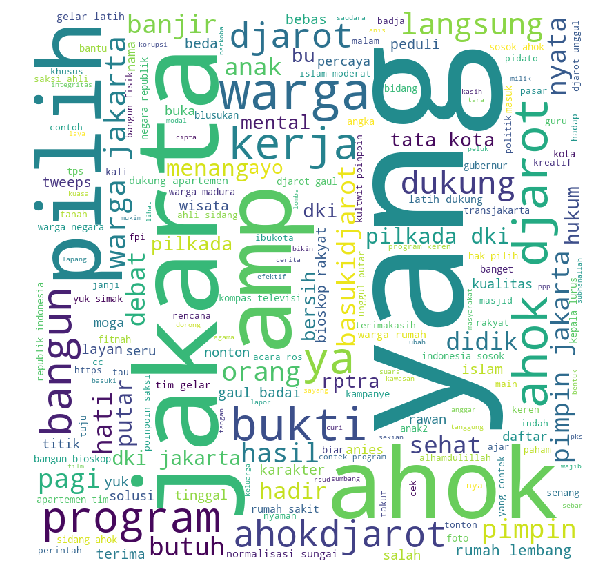

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
comment_words=''
for kalimat in kalimat_final:
  comment_words=comment_words+kalimat
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer() #menghitung kemunculan kata
features=(vectorizer.fit_transform(kalimat_final).todense()) #representasu fitur
print(vectorizer.vocabulary_)

{'penasaran': 871, 'yang': 1303, 'pilih': 894, 'ak': 31, 'layan': 646, 'warga': 1284, 'jakarta': 471, 'lahir': 627, 'program': 927, 'golong': 372, 'sumbu': 1115, 'pendek': 872, 'fpi': 352, 'piara': 890, 'keluarga': 547, 'cendana': 233, 'bibib': 167, 'risiek': 980, 'ulama': 1245, 'mesum': 725, 'demo': 272, 'kerja': 565, 'ahok': 21, 'didzolimi': 281, 'bebas': 131, 'prof': 925, 'edward': 316, 'omar': 821, 'sharif': 1060, 'ahli': 19, 'pidana': 891, 'pndpt': 904, 'unsur': 1254, 'pasal': 852, '156a': 0, 'kuhp': 613, 'djarot': 289, 'gaul': 360, 'badai': 96, 'tata': 1147, 'kota': 600, 'surah': 1119, 'al': 40, 'maidah': 677, 'arti': 85, 'umat': 1246, 'pimpin': 896, 'muslim': 764, 'penjarabersih2': 876, 'penjara': 875, 'biar': 164, 'tunggu': 1229, 'unggul': 1252, 'ikuuut': 436, 'negara': 774, 'republik': 973, 'indonesia': 441, 'sosok': 1096, 'wkwkwkada': 1296, 'udang': 1241, 'dbalik': 267, 'batu': 126, 'dzolimi': 311, 'bgmana': 162, 'jelazz': 488, 'mendolimi': 712, 'islamsampean': 455, 'sehat': 

In [22]:
frame_feat=pd.DataFrame(features)
frame_feat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
frame_sent=pd.DataFrame(sentiment,columns=['sentiment'])
frame_sent.head()

,sentiment
0,netral
1,positif
2,negatif
3,positif
4,positif


In [24]:
frame_sent['sentiment'] = pd.Categorical(frame_sent['sentiment']).codes
frame_sent.head()

,sentiment
0,1
1,2
2,0
3,2
4,2


In [25]:
data_all = pd.concat([frame_feat, frame_sent],axis=1)
data_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,sentiment
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [0]:
vectorizer.vocabulary_.get('pemimpin')

In [27]:
data_all[data_all[1141]>0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,sentiment
293,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
384,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import argparse

In [0]:
models = {
    "knn": KNeighborsClassifier(n_neighbors=1),
    "naive_bayes": GaussianNB(),
    "logit": LogisticRegression(solver="lbfgs",multi_class="auto"),
    "svm": SVC(kernel="rbf",gamma="auto"),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(n_estimators=100),
    "mlp": MLPClassifier(),
}

In [0]:
y = data_all['sentiment'].copy(deep=True)
X = data_all.copy(deep=True)
X.drop(['sentiment'], inplace=True, axis=1)

In [31]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
y.head()

0    1
1    2
2    0
3    2
4    2
Name: sentiment, dtype: int8

In [0]:
(trainX,testX,trainY,testY)=train_test_split(X,y,test_size=0.2,random_state=12)

In [223]:
model=models["logit"]
model.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predictions=model.predict(testX)
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.46      0.59      0.52        32
           1       0.41      0.34      0.38        35
           2       0.62      0.59      0.60        63

    accuracy                           0.52       130
   macro avg       0.50      0.51      0.50       130
weighted avg       0.52      0.52      0.52       130



In [36]:
model=models["random_forest"]
model.fit(trainX,trainY)
predictions=model.predict(testX)
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.44      0.34      0.39        32
           1       0.41      0.43      0.42        35
           2       0.63      0.68      0.66        63

    accuracy                           0.53       130
   macro avg       0.49      0.48      0.49       130
weighted avg       0.52      0.53      0.53       130



In [37]:
model=models["mlp"]
model.fit(trainX,trainY)
predictions=model.predict(testX)
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.50      0.44      0.47        32
           1       0.48      0.63      0.54        35
           2       0.64      0.57      0.61        63

    accuracy                           0.55       130
   macro avg       0.54      0.55      0.54       130
weighted avg       0.56      0.55      0.55       130



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [38]:
model=models["knn"]
model.fit(trainX,trainY)
predictions=model.predict(testX)
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.40      0.59      0.48        32
           1       0.43      0.57      0.49        35
           2       0.72      0.41      0.53        63

    accuracy                           0.50       130
   macro avg       0.52      0.53      0.50       130
weighted avg       0.56      0.50      0.50       130



In [39]:
model=models["naive_bayes"]
model.fit(trainX,trainY)
predictions=model.predict(testX)
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.48      0.44      0.46        32
           1       0.41      0.71      0.52        35
           2       0.70      0.44      0.54        63

    accuracy                           0.52       130
   macro avg       0.53      0.53      0.51       130
weighted avg       0.57      0.52      0.52       130



In [40]:
model=models["decision_tree"]
model.fit(trainX,trainY)
predictions=model.predict(testX)
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.41      0.38      0.39        32
           1       0.32      0.43      0.37        35
           2       0.65      0.56      0.60        63

    accuracy                           0.48       130
   macro avg       0.46      0.45      0.45       130
weighted avg       0.50      0.48      0.49       130



In [224]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(trainX,trainY)

#Predict the response for test dataset
y_pred = clf.predict(testX)

# Model Accuracy, how often is the classifier correct?
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.41      0.38      0.39        32
           1       0.32      0.43      0.37        35
           2       0.65      0.56      0.60        63

    accuracy                           0.48       130
   macro avg       0.46      0.45      0.45       130
weighted avg       0.50      0.48      0.49       130



In [0]:
from keras.models import Sequential
from keras import layers
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D, GlobalAveragePooling1D,Dropout

In [213]:
input_dim = trainX.shape[1]
input_dim

1308

In [0]:
model = Sequential()
model.add(layers.Dense(256, input_dim=input_dim, activation='relu',name='layer1'))
model.add(layers.Dense(64, activation='relu',name='layer2'))
model.add(layers.Dense(16, activation='relu',name='layer4'))
model.add(layers.Dense(1, activation='relu',name='output'))

In [215]:
model.compile(loss='binary_crossentropy', optimizer='adagrad',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 256)               335104    
_________________________________________________________________
layer2 (Dense)               (None, 64)                16448     
_________________________________________________________________
layer4 (Dense)               (None, 16)                1040      
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 352,609
Trainable params: 352,609
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(trainX, trainY,epochs=30,verbose=False,validation_data=(testX, testY),batch_size=120)

In [217]:
loss, accuracy = model.evaluate(trainX, trainY, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(testX, testY, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5981
Testing Accuracy:  0.4308


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

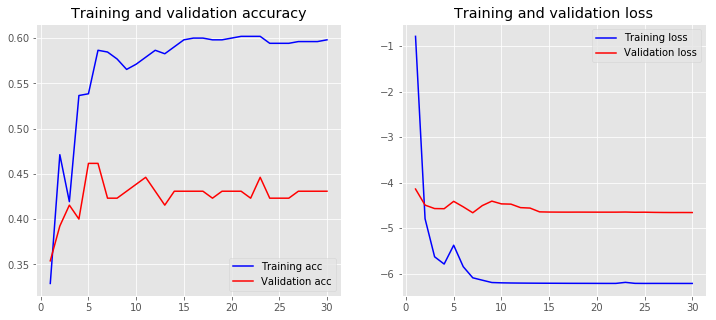

In [219]:
plot_history(history)

**Deep Learning 2**

In [0]:
model2 = Sequential()
model2.add(layers.Dense(256, input_dim=input_dim, activation='relu',name='layer1'))
model2.add(layers.Dense(128, activation='relu',name='layer2'))
model2.add(layers.Dense(64, activation='relu',name='layer4'))
model2.add(layers.Dense(2, activation='tanh',name='output'))

In [139]:
model2.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 256)               335104    
_________________________________________________________________
layer2 (Dense)               (None, 128)               32896     
_________________________________________________________________
layer4 (Dense)               (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 2)                 130       
Total params: 376,386
Trainable params: 376,386
Non-trainable params: 0
_________________________________________________________________


In [0]:
history2 = model.fit(trainX, trainY,epochs=50,verbose=False,validation_data=(testX, testY),batch_size=256)

In [141]:
loss, accuracy = model.evaluate(trainX, trainY, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(testX, testY, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5404
Testing Accuracy:  0.3231


In [0]:
  import matplotlib.pyplot as plt
  plt.style.use('ggplot')

  def plot_history(history2):
      acc = history2.history['acc']
      val_acc = history2.history['val_acc']
      loss = history2.history['loss']
      val_loss = history2.history['val_loss']
      x = range(1, len(acc) + 1)

      plt.figure(figsize=(12, 5))
      plt.subplot(1, 2, 1)
      plt.plot(x, acc, 'b', label='Training acc')
      plt.plot(x, val_acc, 'r', label='Validation acc')
      plt.title('Training and validation accuracy')
      plt.legend()
      plt.subplot(1, 2, 2)
      plt.plot(x, loss, 'b', label='Training loss')
      plt.plot(x, val_loss, 'r', label='Validation loss')
      plt.title('Training and validation loss')
      plt.legend()

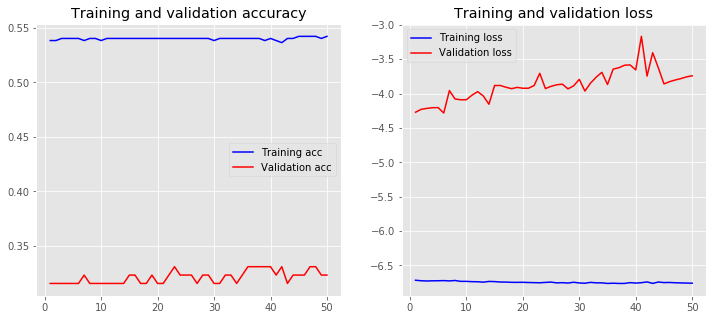

In [143]:
plot_history(history2)

**Deep Learning 3**

In [0]:
import os
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Bidirectional
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.models import model_from_json
from keras.models import load_model


In [0]:
model3 = Sequential()
model3.add(layers.Dense(256, input_dim=input_dim, activation='relu',name='layer1'))
model3.add(layers.Dense(512, activation='relu',name='layer2'))
model3.add(layers.Dense(512, activation='relu',name='layer4'))
model3.add(layers.Dense(1308, activation='softmax',name='output'))

In [0]:
model3.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [0]:
history3 = model.fit(trainX, trainY,epochs=100,verbose=False,validation_data=(testX, testY),batch_size=120)

In [151]:
loss, accuracy = model.evaluate(trainX, trainY, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(testX, testY, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5404
Testing Accuracy:  0.3154


DEEP 4

In [0]:
from keras.models import Sequential
from keras import layers
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D, GlobalAveragePooling1D,Dropout

In [153]:
input_dim = trainX.shape[1]
input_dim

1308

In [0]:
model3 = Sequential()
model3.add(layers.Dense(256, input_dim=input_dim, activation='relu',name='layer1'))
model3.add(layers.Dense(64, activation='relu',name='layer2'))
model3.add(layers.Dense(64, activation='relu',name='layer4'))
model3.add(layers.Dense(1, activation='softmax',name='output'))

In [0]:
model3.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [0]:
history3 = model.fit(trainX, trainY,epochs=500,verbose=False,validation_data=(testX, testY),batch_size=200)

In [158]:
loss, accuracy = model.evaluate(trainX, trainY, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(testX, testY, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5404
Testing Accuracy:  0.3231


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history3):
    acc = history2.history['acc']
    val_acc = history2.history['val_acc']
    loss = history2.history['loss']
    val_loss = history2.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

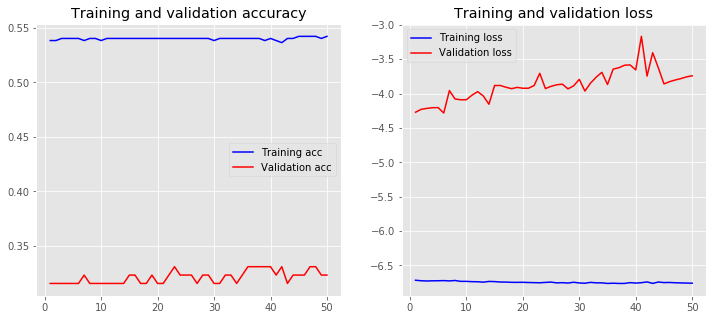

In [161]:
plot_history(history3)